In [1]:
from Data.IMDB import IMDB
from Coarsener.HeteroRGCNCoarsener import HeteroRGCNCoarsener

/home/robin/thesis/hetero-conv-matching/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
imdb = IMDB()
original_graph = imdb.load_graph()

In [5]:
original_graph

Graph(num_nodes={'actor': 5257, 'director': 2081, 'movie': 4278},
      num_edges={('actor', 'actortomovie', 'movie'): 12828, ('director', 'directortomovie', 'movie'): 4278, ('movie', 'movietoactor', 'actor'): 12828, ('movie', 'movietodirector', 'director'): 4278},
      metagraph=[('actor', 'movie', 'actortomovie'), ('movie', 'actor', 'movietoactor'), ('movie', 'director', 'movietodirector'), ('director', 'movie', 'directortomovie')])

In [7]:

num_nearest_init_neighbors_per_type = {"actortomovie": 10, "directortomovie": 10, "movietoactor":10, "movietodirector":10, "actor":10, "director":10, "movie":10}

coarsener = HeteroRGCNCoarsener(original_graph, 0.4, num_nearest_init_neighbors_per_type, device="cuda:0", pairs_per_level=10,norm_p=2, approx_neigh=False, add_feat=False, use_out_degree=False) 

coarsener.init()

lols
hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
_create_h_spatial_rgcn 0.017414331436157227
_init_costs 0.005712032318115234
_get_union 2.824716806411743


/home/robin/thesis/hetero-conv-matching/Coarsener/HeteroRGCNCoarsener.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node1s = torch.tensor(node1s, dtype=torch.long, device=self.device)
/home/robin/thesis/hetero-conv-matching/Coarsener/HeteroRGCNCoarsener.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node2s = torch.tensor(node2s, dtype=torch.long, device=self.device)


_h_costs 0.09415864944458008
get edges 0.00017213821411132812
create touch 0.00017690658569335938
create connection 0.21304655075073242
to simple 0.06995105743408203
edges & scatter 0.035729169845581055
get edges 0.0004572868347167969
create touch 0.0002205371856689453
create connection 0.006154775619506836
to simple 0.015903472900390625
edges & scatter 0.01265096664428711
get edges 0.00017523765563964844
create touch 0.00017523765563964844
create connection 0.9502463340759277
to simple 0.0957491397857666
edges & scatter 0.05513739585876465
get edges 0.00020003318786621094
create touch 0.00020003318786621094
create connection 0.0223543643951416
to simple 0.040386199951171875
edges & scatter 0.022733688354492188
_create_neighbor_costs 1.7339811325073242
Hi
Hi
Hi
Hi
_find_lowest_cost_edges 0.00994253158569336


In [ ]:
for i in range(200):
    print(i)
    coarsener.coarsen_step()

0


/home/robin/thesis/hetero-conv-matching/.venv/lib/python3.10/site-packages/dgl/transforms/functional.py:1367: DGLWarning: share_ndata argument has been renamed to copy_ndata.
  dgl_warning("share_ndata argument has been renamed to copy_ndata.")


hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
_merge_nodes 2.778231382369995
_h_costs 0.006876707077026367
get edges 0.00018024444580078125
create touch 0.00027179718017578125


/home/robin/thesis/hetero-conv-matching/Coarsener/HeteroRGCNCoarsener.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node1s = torch.tensor(node1s, dtype=torch.long, device=self.device)
/home/robin/thesis/hetero-conv-matching/Coarsener/HeteroRGCNCoarsener.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node2s = torch.tensor(node2s, dtype=torch.long, device=self.device)


create connection 0.17967748641967773
to simple 0.06947851181030273
edges & scatter 0.03925895690917969
get edges 0.0002052783966064453
create touch 0.00020623207092285156
create connection 0.0062181949615478516
to simple 0.02314019203186035
edges & scatter 0.014448881149291992
get edges 0.00042247772216796875
create touch 0.00022983551025390625
create connection 0.9287865161895752
to simple 0.12583374977111816
edges & scatter 0.07367396354675293
get edges 0.0002079010009765625
create touch 0.00021457672119140625
create connection 0.021732568740844727
to simple 0.026692867279052734
edges & scatter 0.020385026931762695
_create_neighbor_costs 1.7230618000030518
Hi
Hi
Hi
Hi
_find_lowest_cost_edges 0.009251594543457031
1
hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
hi
actor actortomovie movie
director directortomovie movie
movie movietoactor actor
movie movietodirector director
hi
actor actortomovie movie
director direct

In [36]:
import torch
coarsend_graph = coarsener.summarized_graph

coarsend_graph = coarsend_graph.cpu()
mapping = coarsener.get_mapping("movie")
labels = coarsener.get_labels(mapping, "movie")
coarsend_graph.nodes["movie"].data["label"] = torch.tensor([labels[i] for i in range(len(labels))])
print("ratio", coarsend_graph.num_nodes()/ original_graph.num_nodes() ) 


ratio 0.9612603305785123


In [10]:
import torch
import dgl
from torch_geometric.data import Data
from torch_geometric.data import HeteroData
def from_dgl_hetero_manual(g: dgl.DGLHeteroGraph) -> HeteroData:
    """
    Convert a DGL heterogeneous graph into a PyG HeteroData object.

    Args:
        g (dgl.DGLHeteroGraph): Input DGL heterogeneous graph with node/edge features stored in ndata/edata.

    Returns:
        HeteroData: A PyG HeteroData object with the same node and edge features.
    """
    data = HeteroData()

    # Convert node features for each node type
    for ntype in g.ntypes:
        # Collect all feature fields for this node type
        ndata = g.nodes[ntype].data
        # If there is a 'feat' entry, map it to .x in PyG
        if 'feat' in ndata:
            data[ntype].feat = ndata['feat']
        # Map any other node data fields directly
        for key, value in ndata.items():
            if key != 'feat':
                data[ntype][key] = value

    # Convert edges for each canonical edge type
    for c_etype in g.canonical_etypes:
        src_type, etype, dst_type = c_etype
        # Get edge index (source, target)
        src_nodes, dst_nodes = g.edges(etype=c_etype)
        edge_index = torch.stack([src_nodes, dst_nodes], dim=0)
        # Assign edge_index
        data[c_etype].edge_index = edge_index

        # Collect edge features
        edata = g.edges[c_etype].data
        # If there is a 'feat' entry, map it to .edge_attr
        if 'feat' in edata:
            data[c_etype].edge_attr = edata['feat']
        # Map any other edge data fields directly
        for key, value in edata.items():
            if key != 'feat':
                data[c_etype][key] = value

    return data

def dgl_to_pyg_input(g):
    # Convert DGL heterograph to PyG's HeteroData
    pyg_data = from_dgl_hetero_manual  (g)

    x_dict = {}
    for ntype in g.ntypes:
        if 'feat' in g.nodes[ntype].data:
            x_dict[ntype] = g.nodes[ntype].data['feat']

    edge_index_dict = {}
    for canonical_etype in g.canonical_etypes:
        src_type, rel_type, dst_type = canonical_etype
        src, dst = g.edges(etype=canonical_etype)
        edge_index = torch.stack([src, dst], dim=0)
        edge_index_dict[(src_type, rel_type, dst_type)] = edge_index
    pyg_data.edge_index_dict = edge_index_dict
    return pyg_data,x_dict, edge_index_dict, g.ntypes, g.canonical_etypes


In [18]:
original_data, o_x_dict, o_edge_index_dict, o_node_types, o_edge_types = dgl_to_pyg_input(original_graph)
coarsened_data, c_x_dict, c_edge_index_dict, c_node_types, c_edge_types = dgl_to_pyg_input(coarsend_graph)

In [19]:
import torch
import numpy as np
from torch_geometric.data import HeteroData

# Assuming you already have your hetero_data object
# hetero_data = HeteroData(...)

def create_train_val_test_masks(hetero_data, train_ratio=0.1, val_ratio=0.1, test_ratio=0.8, random_state=42, target_node_type='author'):
    """
    Create training, validation, and testing masks for author nodes.
    
    Args:
        hetero_data: HeteroData object
        train_ratio: Ratio of training data
        val_ratio: Ratio of validation data
        test_ratio: Ratio of testing data
        random_state: Random seed for reproducibility
    
    Returns:
        HeteroData object with train_mask, val_mask, and test_mask added to author nodes
    """
    # Ensure ratios sum to 1
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1"
    
    # Get number of author nodes
    num_authors = hetero_data[target_node_type]["feat"].size(0)
    
    # Create random permutation of node indices
    np.random.seed(random_state)
    indices = np.random.permutation(num_authors)
    
    # Calculate split sizes
    train_size = int(num_authors * train_ratio)
    val_size = int(num_authors * val_ratio)
    
    # Split indices
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]
    
    # Create boolean masks
    train_mask = torch.zeros(num_authors, dtype=torch.bool)
    val_mask = torch.zeros(num_authors, dtype=torch.bool)
    test_mask = torch.zeros(num_authors, dtype=torch.bool)
    
    train_mask[train_indices] = True
    val_mask[val_indices] = True
    test_mask[test_indices] = True
    
    # Add masks to hetero_data
    hetero_data[target_node_type].train_mask = train_mask
    hetero_data[target_node_type].val_mask = val_mask
    hetero_data[target_node_type].test_mask = test_mask
    
    # Print split statistics
    print(f"Split statistics:")
    print(f"  Training: {train_mask.sum()} nodes ({train_mask.sum() / num_authors:.2%})")
    print(f"  Validation: {val_mask.sum()} nodes ({val_mask.sum() / num_authors:.2%})")
    print(f"  Testing: {test_mask.sum()} nodes ({test_mask.sum() / num_authors:.2%})")
    
    return hetero_data

# Example usage
seed = 42 # 44
original_data =  create_train_val_test_masks(original_data, train_ratio=0.1, val_ratio=0.1, test_ratio=0.8, target_node_type='movie', random_state=seed)
coarsened_data = create_train_val_test_masks(coarsened_data, train_ratio=0.1, val_ratio=0.1, test_ratio=0.8, target_node_type='movie', random_state=seed)

# Accessing the masks
# train_nodes = hetero_data['author'].x[hetero_data['author'].train_mask]
# val_nodes = hetero_data['author'].x[hetero_data['author'].val_mask]
# test_nodes = hetero_data['author'].x[hetero_data['author'].test_mask]


Split statistics:
  Training: 427 nodes (9.98%)
  Validation: 427 nodes (9.98%)
  Testing: 3424 nodes (80.04%)
Split statistics:
  Training: 422 nodes (9.98%)
  Validation: 422 nodes (9.98%)
  Testing: 3384 nodes (80.04%)


In [20]:
from torch_sparse import SparseTensor

def build_adj_t_dict(data):
    adj_t_dict = {}
    for (src_type, rel, dst_type), edge_index in data.edge_index_dict.items():
        src_idx = edge_index[0]                   # sources
        dst_idx = edge_index[1]                   # destinations
        N_src   = data[src_type].num_nodes
        N_dst   = data[dst_type].num_nodes

        # row = destination, col = source, shape = (N_dst, N_src)
        adj_t = SparseTensor(row=dst_idx,
                             col=src_idx,
                             sparse_sizes=(N_dst, N_src))
        adj_t_dict[(src_type, rel, dst_type)] = adj_t

    return adj_t_dict

In [21]:

import torch
from torch_geometric.nn import Linear
import torch.nn.functional as F

class HeteroSGC(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels, num_layers,
                  node_types, edge_types, target_node_type, num_lins=1, alpha=0.01):
        super().__init__()
        self.node_types = node_types
        self.edge_types = edge_types
        self.alpha = alpha
        self.num_layers = num_layers
        self.num_lins = num_lins
        self.target_node_type = target_node_type
        
        self.in_lin_dict = torch.nn.ModuleDict()
        for node_type in node_types:
            self.in_lin_dict[node_type] = torch.nn.ModuleList()
            self.in_lin_dict[node_type].append(Linear(-1, hidden_channels))
            for _ in range(num_lins-1):
                self.in_lin_dict[node_type].append(Linear(hidden_channels, hidden_channels))
        self.out_lin = Linear(hidden_channels, out_channels)
    def reset_parameters(self,init_list=None):
        if init_list is None:
            for node_type in self.in_lin_dict.keys():
                for lin in self.in_lin_dict[node_type]:
                    lin.reset_parameters()
            self.out_lin.reset_parameters()
        else:
            i = 0
            for self_p in self.parameters():
                if self_p.dim()==2:
                    self_p.data.copy_(init_list[i])
                    i += 1
            
    def forward(self, x_dict, adj_t_dict, get_embeddings=False):
        h_dict = {}
        for node_type in x_dict.keys():
            h_dict[node_type] = self.in_lin_dict[node_type][0](x_dict[node_type]).relu_()
            for lin in self.in_lin_dict[node_type][1:]:
                h_dict[node_type] = lin(h_dict[node_type]).relu_()
        for l in range(self.num_layers):
            out_dict = {node_type: [self.alpha*x] for node_type,x in h_dict.items()}
            # out_dict = {node_type: [] for node_type,x in h_dict.items()}
            for edge_type, adj_t in adj_t_dict.items():
                src_type, _, dst_type = edge_type
                out_dict[dst_type].append(adj_t @ h_dict[src_type])
            for node_type in x_dict.keys():
                h_dict[node_type] = torch.sum(torch.stack(out_dict[node_type],dim=0), dim=0)
        target_logits = self.out_lin(h_dict[self.target_node_type])
        if get_embeddings:
            h_dict = {node_type:h for node_type,h in h_dict.items()}
            return target_logits, h_dict
        else:
            return target_logits


Epoch 1:
  Original Graph - Loss: 4.7272, Accuracy: 0.3671
  Coarsened Graph - Loss: 12.7914, Accuracy: 0.2618
  Inverted Coarsened - Accuracy: 0.2615

Epoch 11:
  Original Graph - Loss: 4.7079, Accuracy: 0.3750
  Coarsened Graph - Loss: 4.7143, Accuracy: 0.3723
  Inverted Coarsened - Accuracy: 0.3710

Epoch 21:
  Original Graph - Loss: 1.4897, Accuracy: 0.3584
  Coarsened Graph - Loss: 1.6851, Accuracy: 0.3771
  Inverted Coarsened - Accuracy: 0.3751

Epoch 31:
  Original Graph - Loss: 1.4129, Accuracy: 0.3732
  Coarsened Graph - Loss: 1.2394, Accuracy: 0.2583
  Inverted Coarsened - Accuracy: 0.2580

Epoch 41:
  Original Graph - Loss: 1.1196, Accuracy: 0.3747
  Coarsened Graph - Loss: 1.1026, Accuracy: 0.3723
  Inverted Coarsened - Accuracy: 0.3710

Epoch 51:
  Original Graph - Loss: 1.1237, Accuracy: 0.3770
  Coarsened Graph - Loss: 1.5217, Accuracy: 0.2615
  Inverted Coarsened - Accuracy: 0.2612

Epoch 61:
  Original Graph - Loss: 1.1490, Accuracy: 0.3756
  Coarsened Graph - Loss: 1.

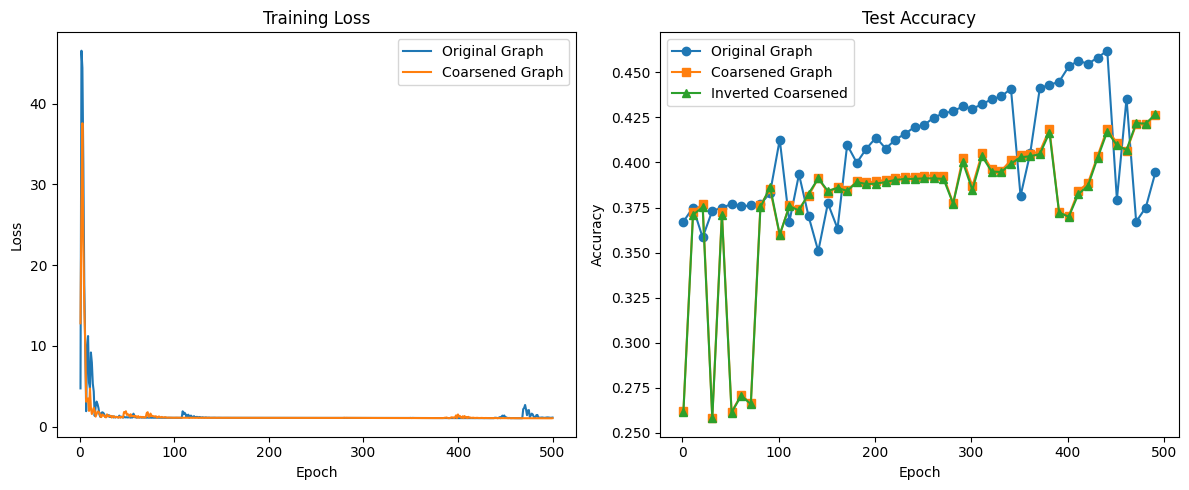

Final Performance Comparison:
Original Graph Accuracy: 0.3946
Coarsened Graph Accuracy: 0.4264
Inverted Coarsened Accuracy: 0.4268


In [34]:
# Import necessary libraries (if not already imported)
import torch
import torch.nn.functional as F
import numpy as np
#from Models.GNNs.HGCN import ImprovedHeteroGNN, HeteroSGC
from torch_geometric.utils import to_torch_csr_tensor

original_x_dict = o_x_dict
coarsened_x_dict = c_x_dict
o_metadata = (o_node_types, o_edge_types)
c_metadata=(c_node_types, c_edge_types)
#original_x_dict.update({"conference": torch.zeros((original_data["conference"]["num_nodes"], 1))})# = 0  #= 0#
#coarsened_x_dict.update({"conference": torch.zeros((coarsened_data["conference"]["num_nodes"], 1))})# = 0  #= 0#

#num_classes = len(original_data["author"]["label"].unique())

target_node_type = "movie"
# Your existing model definition
num_layers = 3

model_original = HeteroSGC(
    hidden_channels    = 64,
    out_channels       = 4,
    num_layers         = num_layers,
    edge_types         = o_edge_types,
    node_types         = o_node_types,
    target_node_type   = target_node_type,
    alpha              = 0.01,
)

model_coarsened = HeteroSGC(
    hidden_channels    = 64,
    out_channels       = 4,
    num_layers         = num_layers,
    edge_types         = c_edge_types,
    node_types         = c_node_types,
    target_node_type   = target_node_type,
    alpha              = 0.01,
)

# Optimizers
optimizer_original = torch.optim.Adam(model_original.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_coarsened = torch.optim.Adam(model_coarsened.parameters(), lr=0.01, weight_decay=5e-4)


# Function to apply inversion mapping from coarsened to original
def apply_inversion_mapping(coarsened_pred, inversion_map, original_labels, test_mask):
    """
    Maps predictions from coarsened graph back to original graph nodes
    
    Args:
        coarsened_pred: Predictions on coarsened graph
        inversion_map: Mapping from coarsened nodes to original nodes
        original_labels: Ground truth labels of original graph
        
    Returns:
        mapped_accuracy: Accuracy after applying inversion mapping
    """
    correct_count = 0
    total_count = 0
    
    for orig_node, coarsened_node in inversion_map.items():
        if not test_mask[coarsened_node]:
            continue
        coarse_pred = coarsened_pred[coarsened_node]
        orig_label = original_labels[orig_node]
        #print(coarse_pred, orig_label)

        correct = (coarse_pred == orig_label)
    
                
        if correct:
            correct_count += 1
     #   else:
      #      print(f"Mismatch: Coarsened Node {coarsened_node} predicted {coarse_pred}, Original Node {orig_node} label {orig_label}")
        total_count += 1
    
    return correct_count / total_count if total_count > 0 else 0

# Training function for original graph
def train_original():
    model_original.train()
    optimizer_original.zero_grad()
    original_adj_t_dict = original_adj_t_dict  = build_adj_t_dict(original_data)
    #print(original_x_original_data.edge_index_dict)
    out = model_original(original_x_dict, original_adj_t_dict)      # [N_orig_author, 4]
    # either wrap logits in log‐softmax or switch to cross_entropy:
    loss = F.cross_entropy(
        out[ original_data["movie"].train_mask ], 
        original_data["movie"].label[ original_data["movie"].train_mask ]
    )
    loss.backward()
    optimizer_original.step()
    return loss.item()

# Training function for coarsened graph
def train_coarsened():
    model_coarsened.train()
    optimizer_coarsened.zero_grad()
    coarsend_adj_t_dict = build_adj_t_dict(coarsened_data)
    out = model_coarsened(coarsened_x_dict, coarsend_adj_t_dict)  # [N_coarse_author, 4]
    loss = F.cross_entropy(
        out[ coarsened_data["movie"].train_mask ],
        coarsened_data["movie"].label[ coarsened_data["movie"].train_mask ]
    )

    loss.backward()
    optimizer_coarsened.step()
    return loss.item()

# Evaluation function for original graph
def test_original():
    model_original.eval()
    with torch.no_grad():
        original_adj_t_dict = original_adj_t_dict  = build_adj_t_dict(original_data)
        out  = model_original(original_x_dict, original_adj_t_dict)
        pred = out.argmax(dim=1)
        
        # Calculate accuracy on test set
        correct = ( pred[ original_data["movie"].test_mask ] ==
               original_data["movie"].label[ original_data["movie"].test_mask ] )
        acc = int(correct.sum()) / int(original_data[target_node_type].test_mask.sum())
        return acc

# Evaluation function for coarsened graph
def test_coarsened():
    model_coarsened.eval()
    with torch.no_grad():
        coarsend_adj_t_dict = build_adj_t_dict(coarsened_data)
        out  = model_coarsened(coarsened_x_dict, coarsend_adj_t_dict)
        pred = out.argmax(dim=1)
        mask   = coarsened_data[target_node_type].test_mask      # a BoolTensor of shape [N_coarse_nodes]
        labels = coarsened_data[target_node_type].label           # a LongTensor of shape [N_coarse_nodes]

        # compute the accuracy:
        correct     = (pred[mask] == labels[mask]).sum().item()
        total_tests = mask.sum().item()
        coarsened_acc = correct / total_tests
        inverted_acc = 0
        
        # Apply inversion mapping to evaluate how coarsened predictions map to original graph
        inverted_acc  = apply_inversion_mapping(
             pred,  
             mapping,
             original_data[target_node_type]["label"], 
             coarsened_data[target_node_type].test_mask
         )
        return coarsened_acc, inverted_acc

# Training for 50 epochs and comparing both models
results = {
    "epoch": [],
    "original_loss": [],
    "coarsened_loss": [],
    "original_acc": [],
    "coarsened_acc": [],
    "inverted_acc": []
}
epochs = 500
for epoch in range(epochs):
    # Train both models
    original_loss = train_original()
    coarsened_loss = train_coarsened()
    
    # Store results
    results["epoch"].append(epoch+1)
    results["original_loss"].append(original_loss)
    results["coarsened_loss"].append(coarsened_loss)
    
    # Evaluate every 10 epochs
    if epoch % 10 == 0:
        original_acc = test_original()
        coarsened_acc, inverted_acc = test_coarsened()
        
        results["original_acc"].append(original_acc)
        results["coarsened_acc"].append(coarsened_acc)
        results["inverted_acc"].append(inverted_acc)
        
        print(f'Epoch {epoch+1}:')
    
    
        print(f'  Original Graph - Loss: {original_loss:.4f}, Accuracy: {original_acc:.4f}')
        print(f'  Coarsened Graph - Loss: {coarsened_loss:.4f}, Accuracy: {coarsened_acc:.4f}')
        print(f'  Inverted Coarsened - Accuracy: {inverted_acc:.4f}')
        print()

# Visualization of results
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results["epoch"], results["original_loss"], label="Original Graph")
plt.plot(results["epoch"], results["coarsened_loss"], label="Coarsened Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
x = [results["epoch"][i] for i in range(0, epochs, 10)]
plt.plot(x, results["original_acc"], 'o-', label="Original Graph")
plt.plot(x, results["coarsened_acc"], 's-', label="Coarsened Graph")
plt.plot(x, results["inverted_acc"], '^-', label="Inverted Coarsened")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Final comparison
print("Final Performance Comparison:")
print(f"Original Graph Accuracy: {results['original_acc'][-1]:.4f}")
print(f"Coarsened Graph Accuracy: {results['coarsened_acc'][-1]:.4f}")
print(f"Inverted Coarsened Accuracy: {results['inverted_acc'][-1]:.4f}")

# Calculate speedup from using coarsened graph
# (You would need to time the training for a proper comparison)

In [26]:
from torch_geometric.nn import HeteroConv, SAGEConv

class ImprovedHeteroGNN(torch.nn.Module):
    def __init__(self, metadata, hidden_channels, x_dict,num_classes, target_feat="author", num_layers=2, dropout=0.3, with_non_linear = True):
        
        super().__init__()
        self.target_feat = target_feat
        # Extract node types and edge types from metadata
        node_types, edge_types = metadata[0], metadata[1]
        
        # Create embedding layers for each node type with proper dimensions
        self.embeddings = torch.nn.ModuleDict()
        for node_type, feat_dim in { i: x_dict[i].size(1) for i in  x_dict.keys()}.items():
            self.embeddings[node_type] = torch.nn.Linear(feat_dim, hidden_channels)
        
        # Multiple heterogeneous conv layers for message passing
        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv_dict = {}
            for edge_type in edge_types:
                # Use the proper dimensions for source and target nodes
                conv_dict[edge_type] = SAGEConv(
                    hidden_channels, 
                    hidden_channels, 
                 #   add_self_loops=False,
                    normalize=True
                )
            self.convs.append(HeteroConv(conv_dict, aggr='mean'))
        
        # Layer normalization for each node type
        self.layer_norms = torch.nn.ModuleDict({
            node_type: torch.nn.LayerNorm(hidden_channels)
            for node_type in node_types
        })
        if with_non_linear:
            # Output projection layers
            self.output_projs = torch.nn.ModuleDict({
                node_type: torch.nn.Sequential(
                    torch.nn.Linear(hidden_channels, hidden_channels),
                    torch.nn.ReLU(),
                    torch.nn.Dropout(dropout),
                    torch.nn.Linear(hidden_channels, num_classes if node_type == target_feat else hidden_channels)
                )
                for node_type in node_types
            })
        else:
            # Output projection layers
            self.output_projs = torch.nn.ModuleDict({
                node_type: torch.nn.Sequential(
                    torch.nn.Linear(hidden_channels, hidden_channels),
                    torch.nn.Dropout(dropout),
                    torch.nn.Linear(hidden_channels, num_classes if node_type == target_feat else hidden_channels)
                )
                for node_type in node_types
            })
                
        self.dropout = dropout
        
    def forward(self, x_dict, edge_index_dict):
        # Initial embedding of node features
        x_dict = {node_type: self.embeddings[node_type](x) 
                 for node_type, x in x_dict.items()}
        
        # Apply multiple layers of heterogeneous graph convolutions
        for conv in self.convs:
            # Store previous embeddings for residual connections
            x_dict_prev = {k: v.clone() for k, v in x_dict.items()}
            
            # Apply heterogeneous convolution
            x_dict = conv(x_dict, edge_index_dict)
            
            # Apply layer normalization, non-linearity, dropout and residual connection
            x_dict = {
                node_type: self.layer_norms[node_type](
                    F.relu(x) + x_dict_prev[node_type]  # Residual connection
                )
                for node_type, x in x_dict.items()
            }
            
            # Apply dropout to intermediate representations
            x_dict = {
                node_type: F.dropout(x, p=self.dropout, training=self.training)
                for node_type, x in x_dict.items()
            }
        
        # Final projection for each node type
        output_dict = {
            node_type: self.output_projs[node_type](x)
            for node_type, x in x_dict.items()
        }
        
        # Apply log softmax to author nodes (for classification)
        if self.target_feat in output_dict:
            output_dict[self.target_feat] = F.log_softmax(output_dict[self.target_feat], dim=1)
            
        return output_dict


In [33]:
# Import necessary libraries (if not already imported)
import torch
import torch.nn.functional as F
import numpy as np
#from Models.GNNs.HGCN import ImprovedHeteroGNN


original_x_dict = o_x_dict
coarsened_x_dict = c_x_dict
o_metadata = (o_node_types, o_edge_types)
c_metadata=(c_node_types, c_edge_types)
#original_x_dict.update({"conference": torch.zeros((original_data["conference"]["num_nodes"], 1))})# = 0  #= 0#
#coarsened_x_dict.update({"conference": torch.zeros((coarsened_data["conference"]["num_nodes"], 1))})# = 0  #= 0#

#num_classes = len(original_data["author"]["label"].unique())

target_node_type = "movie"
# Your existing model definition
model_original = ImprovedHeteroGNN(metadata=o_metadata,target_feat=target_node_type, x_dict= original_x_dict ,num_classes= 3, dropout=0.1, hidden_channels=64, with_non_linear= True)
model_coarsened = ImprovedHeteroGNN(metadata=c_metadata, target_feat=target_node_type,x_dict= coarsened_x_dict,num_classes= 3, dropout=0.1,hidden_channels=64, with_non_linear= True)

# Optimizers
optimizer_original = torch.optim.Adam(model_original.parameters(), lr=0.001) # weight_decay=5e-4
optimizer_coarsened = torch.optim.Adam(model_coarsened.parameters(), lr=0.001) #, weight_decay=5e-4


# Function to apply inversion mapping from coarsened to original
def apply_inversion_mapping(coarsened_pred, inversion_map, original_labels, test_mask):
    """
    Maps predictions from coarsened graph back to original graph nodes
    
    Args:
        coarsened_pred: Predictions on coarsened graph
        inversion_map: Mapping from coarsened nodes to original nodes
        original_labels: Ground truth labels of original graph
        
    Returns:
        mapped_accuracy: Accuracy after applying inversion mapping
    """
    correct_count = 0
    total_count = 0
    
    for orig_node, coarsened_node in inversion_map.items():
        if not test_mask[coarsened_node]:
            continue
        coarse_pred = coarsened_pred[coarsened_node]
        orig_label = original_labels[orig_node]
        #print(coarse_pred, orig_label)

        correct = (coarse_pred == orig_label)
    
                
        if correct:
            correct_count += 1
     #   else:
      #      print(f"Mismatch: Coarsened Node {coarsened_node} predicted {coarse_pred}, Original Node {orig_node} label {orig_label}")
        total_count += 1
    
    return correct_count / total_count if total_count > 0 else 0

# Training function for original graph
def train_original():
    model_original.train()
    optimizer_original.zero_grad()
    
    #print(original_x_original_data.edge_index_dict)
    out = model_original(original_x_dict, original_data.edge_index_dict)
    loss = F.nll_loss(
        out[target_node_type][original_data[target_node_type].train_mask], 
        original_data[target_node_type]["label"][original_data[target_node_type].train_mask]
    )
    loss.backward()
    optimizer_original.step()
    return loss.item()

# Training function for coarsened graph
def train_coarsened():
    model_coarsened.train()
    optimizer_coarsened.zero_grad()
    out = model_coarsened(coarsened_x_dict, coarsened_data.edge_index_dict)
    loss = F.nll_loss(
        out[target_node_type][coarsened_data[target_node_type].train_mask], 
        coarsened_data[target_node_type]["label"][coarsened_data[target_node_type].train_mask]
    )
    loss.backward()
    optimizer_coarsened.step()
    return loss.item()

# Evaluation function for original graph
def test_original():
    model_original.eval()
    with torch.no_grad():
        out = model_original(original_x_dict, original_data.edge_index_dict)
        pred = out[target_node_type].argmax(dim=1)
        
        # Calculate accuracy on test set
        correct = pred[original_data[target_node_type].test_mask] == original_data[target_node_type]["label"][original_data[target_node_type].test_mask]
        acc = int(correct.sum()) / int(original_data[target_node_type].test_mask.sum())
        return acc

# Evaluation function for coarsened graph
def test_coarsened():
    model_coarsened.eval()
    with torch.no_grad():
        out = model_coarsened(original_x_dict, original_data.edge_index_dict)
        pred = out[target_node_type].argmax(dim=1)
        
        # Calculate accuracy on test set
        coarsened_acc = int(
            (pred[original_data[target_node_type].test_mask] == 
             original_data[target_node_type]["label"][original_data[target_node_type].test_mask]).sum()
        ) / int(original_data[target_node_type].test_mask.sum())
        inverted_acc = 0
        out = model_coarsened(coarsened_x_dict, coarsened_data.edge_index_dict)
        pred = out[target_node_type].argmax(dim=1)
        
        #Apply inversion mapping to evaluate how coarsened predictions map to original graph
        inverted_acc  = apply_inversion_mapping(
             pred,  
             mapping,
             original_data[target_node_type]["label"], 
             coarsened_data[target_node_type].test_mask
         )
        return coarsened_acc, inverted_acc

# Training for 50 epochs and comparing both models
results = {
    "epoch": [],
    "original_loss": [],
    "coarsened_loss": [],
    "original_acc": [],
    "coarsened_acc": [],
    "inverted_acc": []
}

for epoch in range(500):
    # Train both models
    original_loss = train_original()
    coarsened_loss = train_coarsened()
    
    # Store results
    results["epoch"].append(epoch+1)
    results["original_loss"].append(original_loss)
    results["coarsened_loss"].append(coarsened_loss)
    
    # Evaluate every 10 epochs
    if epoch % 10 == 0:
        original_acc = test_original()
        coarsened_acc, inverted_acc = test_coarsened()
        
        results["original_acc"].append(original_acc)
        results["coarsened_acc"].append(coarsened_acc)
        results["inverted_acc"].append(inverted_acc)
        
        print(f'Epoch {epoch+1}:')
    
    
        print(f'  Original Graph - Loss: {original_loss:.4f}, Accuracy: {original_acc:.4f}')
        print(f'  Coarsened Graph - Loss: {coarsened_loss:.4f}, Accuracy: {coarsened_acc:.4f}')
        print(f'  Inverted Coarsened - Accuracy: {inverted_acc:.4f}')
        print()

# Visualization of results
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results["epoch"], results["original_loss"], label="Original Graph")
plt.plot(results["epoch"], results["coarsened_loss"], label="Coarsened Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
x = [results["epoch"][i] for i in range(0, 200, 10)]
plt.plot(x, results["original_acc"], 'o-', label="Original Graph")
plt.plot(x, results["coarsened_acc"], 's-', label="Coarsened Graph")
plt.plot(x, results["inverted_acc"], '^-', label="Inverted Coarsened")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Final comparison
print("Final Performance Comparison:")
print(f"Original Graph Accuracy: {results['original_acc'][-1]:.4f}")
print(f"Coarsened Graph Accuracy: {results['coarsened_acc'][-1]:.4f}")
print(f"Inverted Coarsened Accuracy: {results['inverted_acc'][-1]:.4f}")

# Calculate speedup from using coarsened graph
# (You would need to time the training for a proper comparison)

Epoch 1:
  Original Graph - Loss: 1.1377, Accuracy: 0.3759
  Coarsened Graph - Loss: 1.1359, Accuracy: 0.3756
  Inverted Coarsened - Accuracy: 0.3719

Epoch 11:
  Original Graph - Loss: 1.0919, Accuracy: 0.3762
  Coarsened Graph - Loss: 1.0904, Accuracy: 0.3750
  Inverted Coarsened - Accuracy: 0.3710

Epoch 21:
  Original Graph - Loss: 1.0922, Accuracy: 0.3770
  Coarsened Graph - Loss: 1.0961, Accuracy: 0.3750
  Inverted Coarsened - Accuracy: 0.3710

Epoch 31:
  Original Graph - Loss: 1.0912, Accuracy: 0.3744
  Coarsened Graph - Loss: 1.0861, Accuracy: 0.3750
  Inverted Coarsened - Accuracy: 0.3710

Epoch 41:
  Original Graph - Loss: 1.0852, Accuracy: 0.4019
  Coarsened Graph - Loss: 1.0890, Accuracy: 0.3750
  Inverted Coarsened - Accuracy: 0.3710

Epoch 51:
  Original Graph - Loss: 1.0824, Accuracy: 0.4252
  Coarsened Graph - Loss: 1.0859, Accuracy: 0.3759
  Inverted Coarsened - Accuracy: 0.3722

Epoch 61:
  Original Graph - Loss: 1.0739, Accuracy: 0.3820
  Coarsened Graph - Loss: 1.0

KeyboardInterrupt: 